Data Preprocessing

In [20]:
import pandas as pd
rain = pd.read_csv('../StatNZ-NoaaData-1994-2023-Auckland/auckland_rain_temp_1966to2023statsNZ_Noaa.csv', parse_dates=['Date'])
rain.head()

,Date,Rainfall(mm),Tavg,Tmax,Tmin
0,1/01/1966,0.0,18.0,22.2,13.9
1,2/01/1966,26.2,20.5,23.9,17.1
2,3/01/1966,0.0,20.3,23.5,17.1
3,4/01/1966,0.0,20.3,24.4,16.2
4,5/01/1966,1.3,20.6,23.4,17.8


In [21]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21153 entries, 0 to 21152
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          21153 non-null  object 
 1   Rainfall(mm)  21149 non-null  float64
 2   Tavg          21153 non-null  float64
 3   Tmax          21105 non-null  float64
 4   Tmin          21069 non-null  float64
dtypes: float64(4), object(1)
memory usage: 826.4+ KB


In [22]:
rain.isnull().sum()


Date             0
Rainfall(mm)     4
Tavg             0
Tmax            48
Tmin            84
dtype: int64

In [23]:
rain['Tmax'].interpolate(method='linear', inplace=True, limit_direction='both')
rain['Tmin'].interpolate(method='linear', inplace=True, limit_direction='both')

# Checking for Remaining Missing Values
missing_values = rain.isna().sum()
print(missing_values)

Date            0
Rainfall(mm)    4
Tavg            0
Tmax            0
Tmin            0
dtype: int64


In [24]:
rain.head()


,Date,Rainfall(mm),Tavg,Tmax,Tmin
0,1/01/1966,0.0,18.0,22.2,13.9
1,2/01/1966,26.2,20.5,23.9,17.1
2,3/01/1966,0.0,20.3,23.5,17.1
3,4/01/1966,0.0,20.3,24.4,16.2
4,5/01/1966,1.3,20.6,23.4,17.8


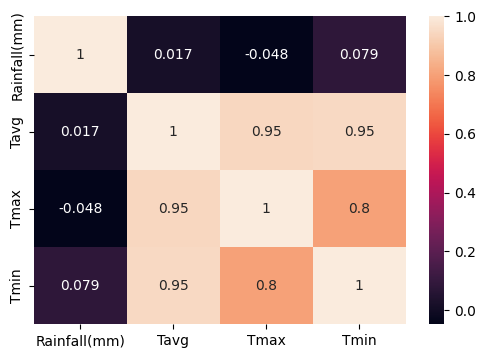

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Heatmap for correlation between variables
rain_1966_2023 = rain.set_index('Date')
# Select only the numeric columns from the 'weather' DataFrame


plt.figure(figsize=(6, 4))
sns.heatmap(rain_1966_2023.corr(), annot=True)
plt.show()

<Axes: xlabel='Date'>

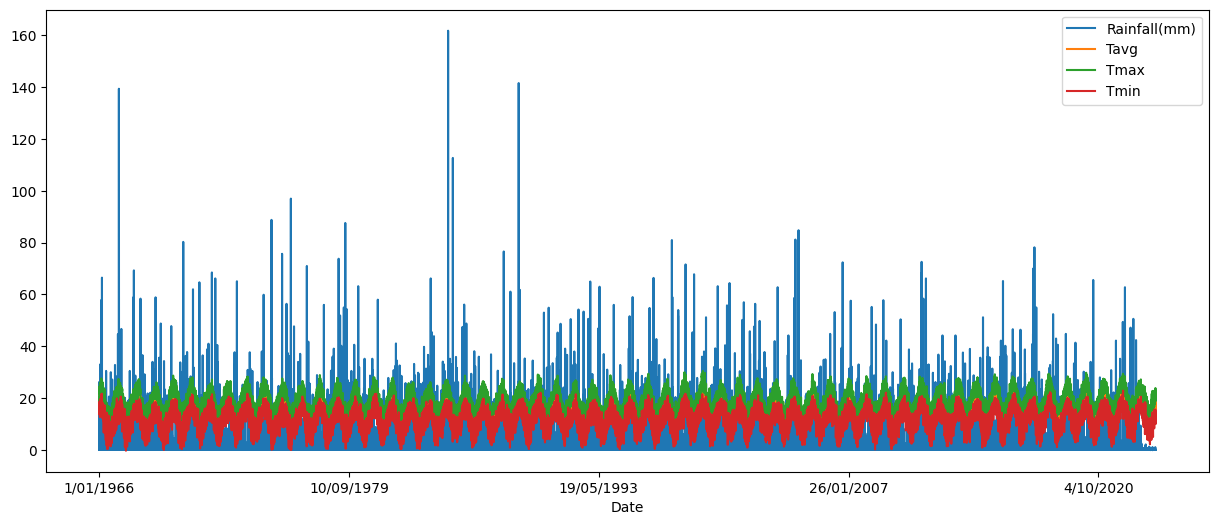

In [26]:
rain_1966_2023.plot(figsize=(15, 6))

In [27]:
rain_1966_2023.describe()

,Rainfall(mm),Tavg,Tmax,Tmin
count,21149.000000,21153.000000,21153.000000,21153.000000
mean,2.973610,15.464740,19.016449,11.909846
std,7.256012,3.745145,3.869409,4.030761
min,0.000000,5.000000,8.100000,-0.300000
25%,0.000000,12.600000,15.900000,9.200000
50%,0.010000,15.400000,18.700000,12.100000
75%,2.500000,18.400000,22.100000,15.000000
max,161.800000,25.600000,30.500000,22.900000


In [28]:
rain_1966_2023.head()

,Rainfall(mm),Tavg,Tmax,Tmin
Date,,,,
1/01/1966,0.0,18.0,22.2,13.9
2/01/1966,26.2,20.5,23.9,17.1
3/01/1966,0.0,20.3,23.5,17.1
4/01/1966,0.0,20.3,24.4,16.2
5/01/1966,1.3,20.6,23.4,17.8


# Lag Features

In [29]:
lag_size = 7

# Create lag features for 'Rainfall (mm)'
for i in range(1, lag_size + 1):
    rain_1966_2023[f'Rainfall_lag_{i}'] = rain_1966_2023['Rainfall(mm)'].shift(i)

for i in range(1, lag_size + 1):
    rain_1966_2023[f'Tavg_lag_{i}'] = rain_1966_2023['Tavg'].shift(i)
    
for i in range(1, lag_size + 1):
    rain_1966_2023[f'Tmax_lag_{i}'] = rain_1966_2023['Tmax'].shift(i)
    
for i in range(1, lag_size + 1):
    rain_1966_2023[f'Tmin_lag_{i}'] = rain_1966_2023['Tmin'].shift(i)

rain_1966_2023.dropna(inplace=True)  # Drop rows with NaN values in the lag features

# Split Data

In [30]:
rain_1966_2023.columns


Index(['Rainfall(mm)', 'Tavg', 'Tmax', 'Tmin', 'Rainfall_lag_1',
       'Rainfall_lag_2', 'Rainfall_lag_3', 'Rainfall_lag_4', 'Rainfall_lag_5',
       'Rainfall_lag_6', 'Rainfall_lag_7', 'Tavg_lag_1', 'Tavg_lag_2',
       'Tavg_lag_3', 'Tavg_lag_4', 'Tavg_lag_5', 'Tavg_lag_6', 'Tavg_lag_7',
       'Tmax_lag_1', 'Tmax_lag_2', 'Tmax_lag_3', 'Tmax_lag_4', 'Tmax_lag_5',
       'Tmax_lag_6', 'Tmax_lag_7', 'Tmin_lag_1', 'Tmin_lag_2', 'Tmin_lag_3',
       'Tmin_lag_4', 'Tmin_lag_5', 'Tmin_lag_6', 'Tmin_lag_7'],
      dtype='object')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
features = ['Tavg', 'Tmax', 'Tmin', 'Rainfall(mm)',
       'Rainfall_lag_2', 'Rainfall_lag_3', 'Rainfall_lag_4', 'Rainfall_lag_5',
       'Rainfall_lag_6', 'Rainfall_lag_7', 'Tavg_lag_1', 'Tavg_lag_2',
       'Tavg_lag_3', 'Tavg_lag_4', 'Tavg_lag_5', 'Tavg_lag_6', 'Tavg_lag_7',
       'Tmax_lag_1', 'Tmax_lag_2', 'Tmax_lag_3', 'Tmax_lag_4', 'Tmax_lag_5',
       'Tmax_lag_6', 'Tmax_lag_7', 'Tmin_lag_1', 'Tmin_lag_2', 'Tmin_lag_3',
       'Tmin_lag_4', 'Tmin_lag_5', 'Tmin_lag_6', 'Tmin_lag_7']

X = rain_1966_2023[features]

y = rain_1966_2023['Rainfall_lag_1']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the shape of X_scaled and y
print("X_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)

# Check for NaN or missing values
print("NaN or missing values in X_scaled:", pd.DataFrame(X_scaled).isnull().sum().sum())
print("NaN or missing values in y:", y.isnull().sum())

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Temporal split
# train_end_date = '2000-12-31'
# X_train = X[X.index <= train_end_date]
# y_train = y[y.index <= train_end_date]
# X_test = X[X.index > train_end_date]
# y_test = y[y.index > train_end_date]

X_scaled shape: (21124, 31)
y shape: (21124,)
NaN or missing values in X_scaled: 0
NaN or missing values in y: 0


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor


# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get the names of features
feature_names = X.columns

# Sort features based on importance
sorted_idx = feature_importances.argsort()[::-1]

# Print feature importance ranking
print("Feature ranking:")
for f in range(len(sorted_idx)):
    print(f"{f + 1}. Feature '{feature_names[sorted_idx[f]]}' ({feature_importances[sorted_idx[f]]})")


Feature ranking:
1. Feature 'Rainfall(mm)' (0.10186501665917642)
2. Feature 'Rainfall_lag_2' (0.05984470084609267)
3. Feature 'Tmin_lag_1' (0.0573789100652988)
4. Feature 'Tmin' (0.0543760846421121)
5. Feature 'Tmax_lag_1' (0.050309099896381326)
6. Feature 'Tmax' (0.04999647148012785)
7. Feature 'Tmax_lag_2' (0.03874801214229433)
8. Feature 'Tmin_lag_2' (0.03355917869530464)
9. Feature 'Tavg' (0.03311503426276383)
10. Feature 'Tmin_lag_5' (0.030296156915887974)
11. Feature 'Tmin_lag_7' (0.03002780007882874)
12. Feature 'Tmax_lag_3' (0.0291929370938462)
13. Feature 'Tmax_lag_5' (0.02912526630511366)
14. Feature 'Tmin_lag_3' (0.029103871680427735)
15. Feature 'Tavg_lag_1' (0.028022882620447415)
16. Feature 'Tmin_lag_6' (0.027606749781677573)
17. Feature 'Tmax_lag_7' (0.0266839969438327)
18. Feature 'Tmin_lag_4' (0.026477068881855425)
19. Feature 'Tmax_lag_4' (0.026011970077187904)
20. Feature 'Rainfall_lag_3' (0.022345232720011887)
21. Feature 'Tmax_lag_6' (0.021912362551112684)
22. Feat

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Make predictions on the training set
rf_predictions_train = rf_model.predict(X_train)

# Make predictions on the test set
rf_predictions_test = rf_model.predict(X_test)

# Calculate RMSE for training set
rmse_train = sqrt(mean_squared_error(y_train, rf_predictions_train))

# Calculate MAE for training set
mae_train = mean_absolute_error(y_train, rf_predictions_train)

# Calculate MSE for training set
mse_train = mean_squared_error(y_train, rf_predictions_train)

# Calculate R2 score for training set
r2_train = r2_score(y_train, rf_predictions_train)

# Print the metrics for the training set
print("Random Foreset Training Set Metrics:")
print("Root Mean Squared Error (RMSE):", rmse_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)
print("R2 Score:", r2_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, rf_predictions))

# Calculate MAE
mae = mean_absolute_error(y_test, rf_predictions)

# Calculate MSE
mse = mean_squared_error(y_test, rf_predictions)

# Calculate R2 score
r2 = r2_score(y_test, rf_predictions)

# Print the metrics
print("Random Foreset Root Mean Squared Error (RMSE):", rmse)
print("Random Foreset Mean Absolute Error (MAE):", mae)
print("Random Foreset Mean Squared Error (MSE):", mse)
print("Random Foreset R2 Score:", r2)

Random Foreset Training Set Metrics:
Root Mean Squared Error (RMSE): 2.5893329232375613
Mean Absolute Error (MAE): 1.341091608970945
Mean Squared Error (MSE): 6.7046449873619745
R2 Score: 0.8755029649568611
Random Foreset Root Mean Squared Error (RMSE): 6.520545371386874
Random Foreset Mean Absolute Error (MAE): 3.444857349112426
Random Foreset Mean Squared Error (MSE): 42.51751194031479
Random Foreset R2 Score: 0.11277125876185612


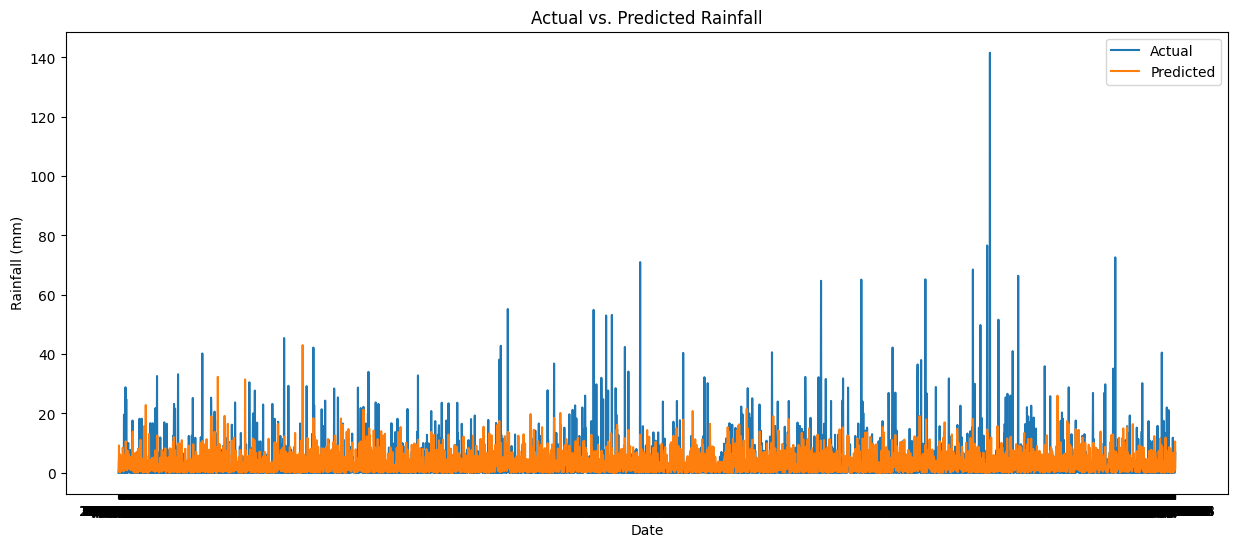

In [34]:
import matplotlib.pyplot as plt
X_test_df = pd.DataFrame(X_test, index=y_test.index, columns=features)

plt.figure(figsize=(15, 6))
plt.plot(X_test_df.index, y_test, label='Actual')
plt.plot(X_test_df.index, rf_predictions, label='Predicted')
plt.title('Actual vs. Predicted Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()


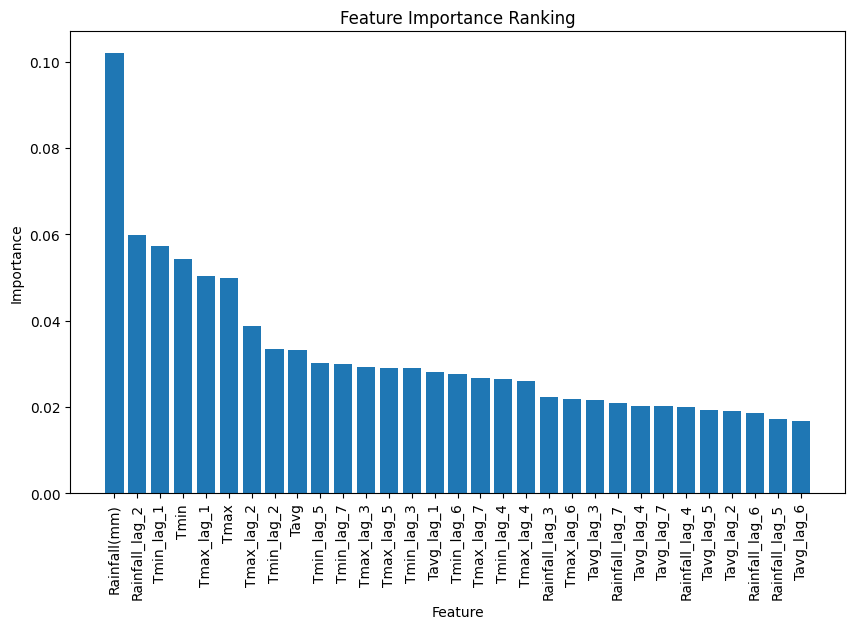

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(sorted_idx)), feature_names[sorted_idx], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Ranking')
plt.show()

In [36]:
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions}, index=X_test_df.index)

# Resample data to a weekly frequency
result_df_weekly = result_df.resample('W').mean()

# Plotting actual vs. predicted values using subplots
fig, ax = plt.subplots(figsize=(15, 6))

# Use result_df_weekly.index to ensure consistency
ax.plot(result_df_weekly.index, result_df_weekly['Actual'], label='Actual', marker='.')
ax.plot(result_df_weekly.index, result_df_weekly['Predicted'], label='Predicted', marker='.')

ax.set_title('Actual vs. Predicted Rainfall (Weekly Resampled)')
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall (mm)')
ax.legend()

plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'